# Simple classification
First we import the necessary packages and generate our datasets

In [3]:
from mp1 import *
from keras.models import Sequential, clone_model
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2, l1

In [4]:
[X_train1, Y_train1] = generate_dataset_classification(300, 20)
Y_train1 = to_categorical(Y_train1)

Creating data:
0
100
200


### First neural network (simple)
We then load our neural network: simple linear classifier with 3 neurons, using softmax for output, cross-entropy as loss and printing accuracy as gradient descent occurs.

In [5]:
model1 = Sequential()
model1.add(Dense(3, input_shape=(5184,), activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
model1.fit(X_train1[0:200], Y_train1[0:200], 
          validation_data=(X_train1[200:300], Y_train1[200:300]),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/step - loss: 8.4545 - acc: 0.2350 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 2/20
200/200 [==============================] - 0s 98us/step - loss: 10.2350 - acc: 0.3650 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 3/20
200/200 [==============================] - 0s 100us/step - loss: 10.2350 - acc: 0.3650 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/20
200/200 [==============================] - 0s 95us/step - loss: 10.2350 - acc: 0.3650 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/20
200/200 [==============================] - 0s 90us/step - loss: 10.2350 - acc: 0.3650 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 6/20
200/200 [==============================] - 0s 88us/step - loss: 10.2350 - acc: 0.3650 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 7/20
200/200 [==============================] - 0s 100us/step - loss: 10.2350 - acc: 0.3650 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 8/20
200/2

Instead of having to optimize the different settings of the Stochastic Gradient Descent, switching to Adam ensures good convergence.

In [7]:
model1 = Sequential()
model1.add(Dense(3, input_shape=(5184,), activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model1.fit(X_train1[0:200], Y_train1[0:200], 
          validation_data=(X_train1[200:300], Y_train1[200:300]),
          epochs=20, batch_size=32)

Train on 200 samples, validate on 100 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/step - loss: 2.0602 - acc: 0.3900 - val_loss: 2.5713 - val_acc: 0.5400
Epoch 2/20
200/200 [==============================] - 0s 103us/step - loss: 1.5625 - acc: 0.5400 - val_loss: 1.0022 - val_acc: 0.7200
Epoch 3/20
200/200 [==============================] - 0s 103us/step - loss: 1.1789 - acc: 0.6150 - val_loss: 0.5300 - val_acc: 0.8500
Epoch 4/20
200/200 [==============================] - 0s 98us/step - loss: 0.7508 - acc: 0.6800 - val_loss: 0.6595 - val_acc: 0.5800
Epoch 5/20
200/200 [==============================] - 0s 100us/step - loss: 0.5055 - acc: 0.7250 - val_loss: 0.4406 - val_acc: 0.9400
Epoch 6/20
200/200 [==============================] - 0s 98us/step - loss: 0.4010 - acc: 0.8900 - val_loss: 0.4337 - val_acc: 0.7900
Epoch 7/20
200/200 [==============================] - 0s 95us/step - loss: 0.3981 - acc: 0.8400 - val_loss: 0.3617 - val_acc: 0.9800
Epoch 8/20
200/200 [=

### Checking the classifier
We can check our classifier for all 3 classes

In [9]:
X_test_r = generate_a_rectangle()
X_test_d = generate_a_disk()
X_test_t = generate_a_triangle()[0]
X_test_r = X_test_r.reshape(1, X_test_r.shape[0])
X_test_d = X_test_d.reshape(1, X_test_d.shape[0])
X_test_t = X_test_t.reshape(1, X_test_t.shape[0])
print(model1.predict(X_test_r))
print(model1.predict(X_test_d))
print(model1.predict(X_test_t))

[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


### We then extract the weights and visualize them
We can even recognize the different shapes.

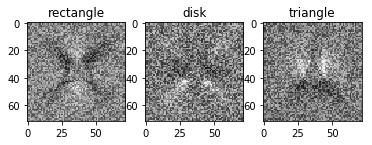

In [10]:
weights = model1.get_weights()[0].reshape(72,72,3)

plt.subplot(131)
plt.imshow(weights[:,:,0], cmap='gray')
plt.title('rectangle')

plt.subplot(132)
plt.imshow(weights[:,:,1], cmap='gray')
plt.title('disk')

plt.subplot(133)
plt.imshow(weights[:,:,2], cmap='gray')
plt.title('triangle')

plt.show()

# A more complicated classification problem
First we generate the data and reshape it for the needs of the convolutional neural network (CNN).
In order to have better results we use training and testing datasets that contain 1,000 images.
Our CNN reaches a performance of:
- 100% training accuracy
- 93% testing at testing accuracy
- 0.3 loss*

Note: implementing early stopping would have lowered the final *loss* at testing reached but seemingly not improved *accuracy*.

In [11]:
n_samples = 1000

[X_train2, Y_train2] = generate_dataset_classification(n_samples, 20, True)
[X_test2, Y_test2] = generate_test_set_classification(n_samples, True)
Y_train2 = to_categorical(Y_train2)
X_train2 = X_train2.reshape(n_samples,72,72,1)
X_test2 = X_test2.reshape(n_samples,72,72,1)

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200
300
400
500
600
700
800
900


### Trying out the previous model for this more complicated task
Spoilers: it doesn't work (because of changing shapes and positions)

In [12]:
X_train_temp = X_train2.reshape(n_samples, 5184)
X_test_temp = X_test2.reshape(n_samples, 5184)

model1.fit(X_train_temp, Y_train2, 
          validation_data=(X_test_temp, Y_test2),
          epochs=20, batch_size=32)

Train on 1000 samples, validate on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 0s 108us/step - loss: 1.8027 - acc: 0.3640 - val_loss: 1.4765 - val_acc: 0.4790
Epoch 2/20
1000/1000 [==============================] - 0s 98us/step - loss: 1.4284 - acc: 0.4370 - val_loss: 1.4269 - val_acc: 0.3830
Epoch 3/20
1000/1000 [==============================] - 0s 95us/step - loss: 1.1621 - acc: 0.5090 - val_loss: 1.6762 - val_acc: 0.4490
Epoch 4/20
1000/1000 [==============================] - 0s 98us/step - loss: 1.0360 - acc: 0.5170 - val_loss: 1.0476 - val_acc: 0.4860
Epoch 5/20
1000/1000 [==============================] - 0s 98us/step - loss: 1.0424 - acc: 0.5070 - val_loss: 0.8399 - val_acc: 0.5810
Epoch 6/20
1000/1000 [==============================] - 0s 99us/step - loss: 0.9215 - acc: 0.5760 - val_loss: 0.9171 - val_acc: 0.6000
Epoch 7/20
1000/1000 [==============================] - 0s 99us/step - loss: 0.8243 - acc: 0.6050 - val_loss: 0.9933 - val_acc: 0.5190
Epoch 

### The final CNN used
64 filters of size 3x3 with 4x4 MaxPooling, 0.5 Dropout and a fully-connected 124-neuron hidden layer.
Loss: cross-entropy; optimizer: adam.

In [13]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(72,72,1), activation='relu'))
model2.add(MaxPooling2D((4,4)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(124, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 124)               2293628   
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 375       
Total params: 2,294,643
Trainable params: 2,294,643
Non-trainable params: 0
_________________________________________________________________


In [14]:
model2.fit(X_train2, Y_train2, 
          validation_data=(X_test2, Y_test2),
          epochs=50, batch_size=32)

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 9s 9ms/step - loss: 1.0912 - acc: 0.5030 - val_loss: 0.8442 - val_acc: 0.6900
Epoch 2/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.7679 - acc: 0.6990 - val_loss: 0.8152 - val_acc: 0.6350
Epoch 3/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6664 - acc: 0.7610 - val_loss: 0.6138 - val_acc: 0.7900
Epoch 4/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5392 - acc: 0.8240 - val_loss: 0.6573 - val_acc: 0.7110
Epoch 5/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4681 - acc: 0.8420 - val_loss: 0.5345 - val_acc: 0.8200
Epoch 6/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4346 - acc: 0.8620 - val_loss: 0.4683 - val_acc: 0.8470
Epoch 7/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3590 - acc: 0.8850 - val_loss: 0.4474 - val_acc: 0.8420
Epoch 8/50
100

In [15]:
model2.evaluate(X_test2, Y_test2)

1000/1000 [==============================] - 1s 994us/step


[0.27490175648313014, 0.925]

# Regression problem

For this regression problem, we had to sort the vertices dataset in a way that we are going to describe.
In the end we noticed that the task the CNN is trying to accomplish can necessitate different filters based on what vertex it wants to locate.
To that end we ended up training a different CNN (that remains pretty simple in terms of architecture) for each of the 6 coordinates.

*Note: we could have tried training only 3 different CNNs and seen if the same CNN can serve for x and y coordinates.*

First we load the dataset and visualize an example.

Creating data:
0
100
200
Creating data:
0
100
200


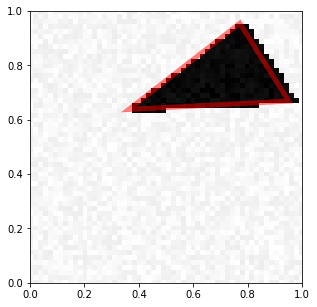

In [16]:
[X_train3, Y_train3] = generate_dataset_regression(300, 20)
[X_test3, Y_test3] = generate_test_set_regression()
X_train3 = X_train3.reshape(300,72,72,1)
X_test3 = X_test3.reshape(300,72,72,1)

i=2
visualize_prediction(X_train3[i], Y_train3[i])

### Normalizing the dataset
We can notice that the vertices are not sorted in the dataset at hand. Here we implement a function that sorts the vertices by computing the projection of the vertices on the (1,1) vector.
We also substract 0.5 to the values so that the values are centered on zero (better initialization for the network).

Additionally, the function returns only one of the coordinates so that we can treat them all separately.

In [17]:
def sort_vertices(dataset, index):
    middle = 0.5
#     res = np.zeros((dataset.shape))
    res = np.zeros((300, 1))
    for i in range(0, 300):
        temp1 = [dataset[i,2*m]+dataset[i,2*m+1] for m in range(0, 3)]
        j = np.argmax(temp1)
        k = np.argmin(temp1)
        l = 3 - j - k
        temp2 = [dataset[i,2*j]-middle, dataset[i,2*j+1]-middle, 
                dataset[i,2*k]-middle, dataset[i,2*k+1]-middle, 
                dataset[i,2*l]-middle, dataset[i,2*l+1]-middle]
        res[i,:] = [temp2[index]]
    return res

In [18]:
Y_train4 = [sort_vertices(Y_train3, i) for i in range(0, 6)]
Y_test4 = [sort_vertices(Y_test3, i) for i in range(0, 6)]

### CNN architecture
The model used is the same for all coordinates: 32 filters of size 9x9, on top of which we add a 32-neuron fully-connected layer.
Activation: ReLu; loss: mean squared error; optimizer: Adam.

In [129]:
reg_param = 0.00001

model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=(72,72,1), activation='relu', kernel_regularizer=l2(reg_param)))
model3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(reg_param)))
# model3.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu', kernel_regularizer=l2(reg_param)))
model3.add(Flatten())
model3.add(Dense(64, activation='relu', kernel_regularizer=l2(reg_param)))
model3.add(Dense(1))
# model3.add(Dense(6))
model3.compile(optimizer='adam', loss='mean_squared_error')
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 68, 68, 32)        832       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 66, 66, 32)        9248      
_________________________________________________________________
flatten_40 (Flatten)         (None, 139392)            0         
_________________________________________________________________
dense_77 (Dense)             (None, 64)                8921152   
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 65        
Total params: 8,931,297
Trainable params: 8,931,297
Non-trainable params: 0
_________________________________________________________________
None


### Training our 6 CNNs
Here we train our 6 CNNs one after the other.
Given the highly non-convex loss function, several runs are necessary to obtain a good performance for each coordinate.

For that reason we retrain the models whose performance is not deemed good enough (criteria: validation loss > 0.05).

In [135]:
threshold = 0.05
retrain_from_scratch = False
errors = np.ones((6,2))
for i in range(0, 6):
    try:
        train_error = models[i].evaluate(X_train3, Y_train4[i], verbose = 0)
        test_error = models[i].evaluate(X_test3, Y_test4[i], verbose = 0)
        print("Evaluating model %i: train error %.3f - test error %.3f" % (i, train_error, test_error))
    except:
        try:
            print("\nModel %i/%i was not defined..." % (i, len(models)))
        except:
            print("\nModels not defined!")
            models = [clone_model(model3) for _ in range(0, 6)]
        test_error = 1
    if test_error > threshold:
        print("\n\nRetraining model %i because it was above threshold (%.3f vs %.3f)" % (i, test_error, threshold))
        if retrain_from_scratch:
            models[i] = clone_model(model3)
            models[i].compile(optimizer='adam', loss='mean_squared_error')
        models[i].fit(X_train3, Y_train4[i], validation_data=(X_test3, Y_test4[i]), epochs=20, batch_size=64)
        print("\n\n")
        train_error = models[i].evaluate(X_train3, Y_train4[i], verbose = 0)
        test_error = models[i].evaluate(X_test3, Y_test4[i], verbose = 0)
        print("Evaluating model %i: train error %.3f - test error %.3f" % (i, train_error, test_error))
    errors[i,:] = [train_error, test_error]
print("\nDone evaluating models!")
        

Evaluating model 0: train error 0.009 - test error 0.030
Evaluating model 1: train error 0.007 - test error 0.028
Evaluating model 2: train error 0.014 - test error 0.037
Evaluating model 3: train error 0.012 - test error 0.036
Evaluating model 4: train error 0.003 - test error 0.047
Evaluating model 5: train error 0.003 - test error 0.050

Done evaluating models!


In [53]:
model3.fit(X_train3, Y_train4, 
          validation_data=(X_test3, Y_test4),
          epochs=20, batch_size=64)

Train on 300 samples, validate on 300 samples
Epoch 1/20
300/300 [==============================] - 4s 13ms/step - loss: 27.3224 - val_loss: 0.0837
Epoch 2/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0811 - val_loss: 0.0838
Epoch 3/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0812 - val_loss: 0.0838
Epoch 4/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1034 - val_loss: 0.0837
Epoch 5/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0810 - val_loss: 0.0836
Epoch 6/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0809 - val_loss: 0.0834
Epoch 7/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0807 - val_loss: 0.0832
Epoch 8/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0805 - val_loss: 0.0830
Epoch 9/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0802 - val_loss: 0.0828
Epoch 10/20
300/300 [=============================

### Visualization of the results
The results are decent. There is quite a bit of overfitting: I experimented with L1, L2 regularization as well as dropout. With this setup I manage to get under 0.05 validation loss on all coordinates.

I believe they could be improved by maybe figuring out a better architecture (how can we regularize?) and by expanding the dataset.

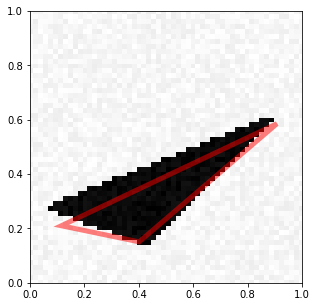

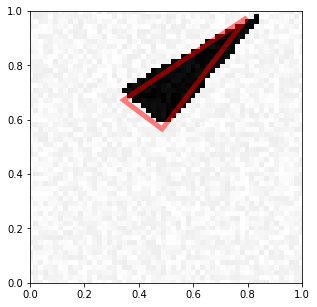

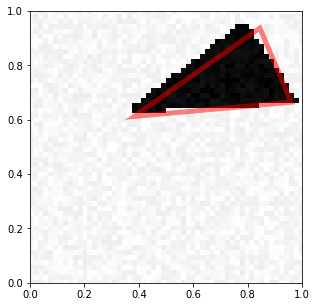

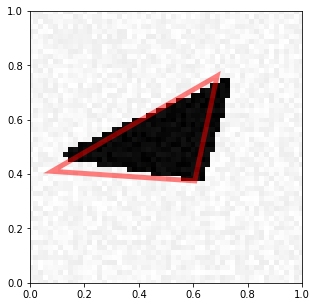

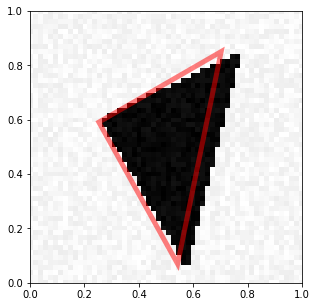

In [136]:
for i in range(0,5):
    predictions = np.array([models[k].predict(X_train3)[i,0]+0.5 for k in range(0,6)])
    visualize_prediction(X_train3[i,:,:], predictions)

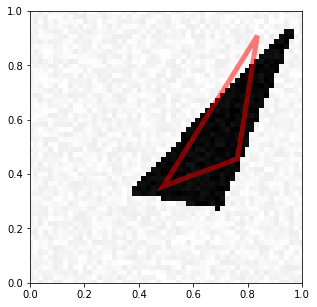

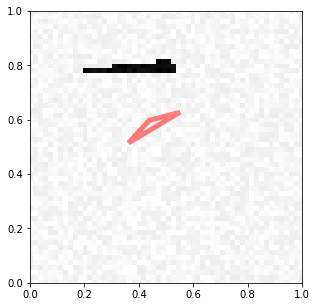

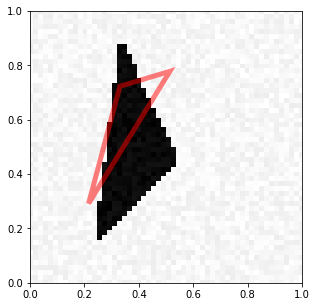

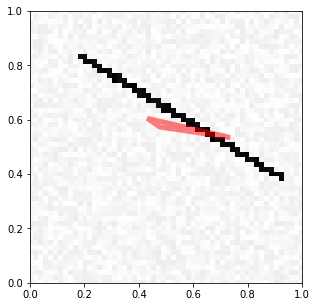

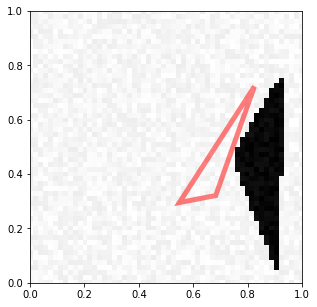

In [137]:
for i in range(0,5):
    predictions = np.array([models[k].predict(X_test3)[i,0]+0.5 for k in range(0,6)])
    visualize_prediction(X_test3[i,:,:], predictions)